# 1. Análise descritiva dos dados
Após copiar o arquivo, vamos carregar as bibliotecas base para fazer a análise descritiva

In [140]:
import pandas as pd
import numpy as np 
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import itertools
from scipy import stats
import math

def descritiva_tabela(data_frame_selec):
    df2 = data_frame_selec.describe(include = 'all')
    df2.loc['dtype'] = data_frame_selec.dtypes
    df2.loc['size'] = len(data_frame_selec)
    df2.loc['% count'] = data_frame_selec.isnull().mean()
    return pd.DataFrame(df2.transpose())

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

Verificando missings, quantidades e quantis

In [3]:
os.chdir('D:\\Users\\krums\\Documents\\MBA FIAP IA\Bootcamp IA & Machine Learning')
df_creditos = pd.read_csv('Dados\\solicitacoescredito.csv')

In [4]:
df_creditos.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [5]:
descritiva_tabela(df_creditos)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,% count
numero_solicitacao,8973.0,NaN,NaN,NaN,4550.042015,2603.485853,1.0,2316.0,4559.0,6802.0,9045.0,int64,8973,0.0
razaoSocial,8973,2759,Malcolm Bolton,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
nomeFantasia,8973,2677,Nathan Jones,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
cnpjSemTraco,8973,2829,AVAO63044598911311,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
maiorAtraso,8973.0,NaN,NaN,NaN,24.642594,66.180793,0.0,3.0,6.0,22.0,1265.0,int64,8973,0.0
margemBrutaAcumulada,8973.0,NaN,NaN,NaN,0.362176,0.201455,0.0,0.281395,0.402895,0.50786,1.0,float64,8973,0.0
percentualProtestos,7475.0,NaN,NaN,NaN,0.01926,0.593579,0.0,0.0,0.0,0.0,36.983728,float64,8973,0.166945
primeiraCompra,8867,1950,2012-12-21T00:00:00,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.011813
prazoMedioRecebimentoVendas,8973.0,NaN,NaN,NaN,23.083027,68.177649,0.0,0.0,0.0,30.0,1605.0,int64,8973,0.0
titulosEmAberto,8973.0,NaN,NaN,NaN,64871.00633,248285.153353,0.0,0.0,0.0,17250.0,3938589.7,float64,8973,0.0


### 1.1 Analisando e filtrando de casos inconsistentes
Para a amostra, temos que verificar:
1. Casos de clientes que tem mais de um nome de `razaoSocial`
2. Casos com solicitação de valor zero

In [6]:
df_creditos.loc[df_creditos['valorSolicitado']<=0.0]   

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista


In [7]:
df_creditos_count_razao = df_creditos.groupby('cnpjSemTraco')['razaoSocial'].nunique().reset_index().rename(columns={'razaoSocial':'qtde_razaoSocial'})

In [8]:
#8 solicitações provenientes de clientes com mais de uma razão social
df_creditos.merge(df_creditos_count_razao[df_creditos_count_razao['qtde_razaoSocial']>1],on=['cnpjSemTraco'],how='inner').head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista,qtde_razaoSocial
0,955,Mrs. Rosemary Fleming,Dr. Josephine Scott,OIOX50590478841783,0,0.000000,NaN,2019-07-10T14:56:04,0,0.0,...,0.0,2010.0,De 6 a 10 anos,93700.0,False,True,0.0,196653.0,2020-03-09T11:11:25,2
1,2453,Mrs. Rosemary Fleming,Dr. Josephine Scott,OIOX50590478841783,0,0.000000,NaN,2019-07-10T14:56:04,0,0.0,...,0.0,2010.0,De 6 a 10 anos,93700.0,False,True,0.0,196653.0,2020-05-29T18:55:51,2
2,4013,Ms. Jasmine Clark,Jeffrey Fisher,OIOX50590478841783,0,0.416005,0.0,2018-12-06T00:00:00,0,0.0,...,5301457.0,2016.0,De 0 a 5 anos,93700.0,False,True,1.0,169974.0,2020-08-11T20:01:06,2
3,2379,Samuel Ryan,Rosie Andrews-Richards,YZJZ74754922350776,0,0.423515,0.0,2020-04-24T00:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,1.0,127853.0,NaN,2
4,2408,Stacey Taylor,Carly Hamilton,YZJZ74754922350776,0,0.000000,0.0,2020-05-28T03:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,0.0,127853.0,NaN,2


In [9]:
df_creditos = df_creditos.merge(df_creditos_count_razao[df_creditos_count_razao['qtde_razaoSocial']==1],on=['cnpjSemTraco'],how='inner')

### 1.2 Criando o dataset para clientes

No caso temos que pegar as features dos clientes que resumem cada um deles. Podemos pegar as features em função to tempo (agregando variaveis por solicitação para cada cliente), porém testaremos a clusterização sem usar a variação temporal ainda. Se isso já ajudar a descrever é um bom progresso:

In [10]:
#features calculadas (em função do tempo)
#buscando a linha índice de solicitação

df_clientes_aux = df_creditos.groupby(df_creditos['cnpjSemTraco'])['numero_solicitacao'].min().reset_index().rename(columns={'numero_solicitacao':'min_solicitacao'})

In [11]:
df_clientes = df_creditos.merge(df_clientes_aux,left_on=['cnpjSemTraco','numero_solicitacao'], right_on=['cnpjSemTraco','min_solicitacao'],how='inner').copy()

Devemos selecionar as variáveis que maximizam o tamanho da amostra. para isso, olhamos todas as variáveis pertinentes aos clientes e verificamos quanto de missing temos. O conjunto de colunas deve ter o menor % de missings possivel.

In [12]:
df1 = descritiva_tabela(df_clientes)
df1.filter(['cnpjSemTraco','maiorAtraso'
            ,'margemBrutaAcumulada','percentualProtestos','primeiraCompra'
            ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
            ,'anoFundacao','capitalSocial','restricoes','empresa_MeEppMei'
            ,'scorePontualidade'],axis=0)['% count'].max()

0.2208067940552017

In [13]:
df_clientes = df_clientes.filter(['cnpjSemTraco','maiorAtraso','valorSolicitado'
                                 ,'margemBrutaAcumulada','percentualProtestos','primeiraCompra'
                                 ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
                                 ,'anoFundacao','capitalSocial','restricoes','empresa_MeEppMei'
                                 ,'scorePontualidade'],axis=1)

Agora temos que fazer um hot encode de algumas variáveis:

1. tirar todos os nulos de variáveis de cliente;
2. Podemos usar como default da `primeiraCompra` pra quem não tem como sendo uma data 1900-01-01;
3. `restricoes` deve ser tratada com hot encode;

In [14]:
df_desc_cli = descritiva_tabela(df_clientes)
df_desc_cli

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,% count
cnpjSemTraco,2826,2826,KEBE17609492220843,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2826,0.0
maiorAtraso,2826.0,NaN,NaN,NaN,19.61465,61.723435,0.0,0.0,4.0,17.0,1265.0,int64,2826,0.0
valorSolicitado,2826.0,NaN,NaN,NaN,167884.675867,2993144.610906,100.0,20000.0,35000.0,50000.0,150000000.0,float64,2826,0.0
margemBrutaAcumulada,2826.0,NaN,NaN,NaN,0.330253,0.219489,0.0,0.122448,0.37544,0.496265,1.0,float64,2826,0.0
percentualProtestos,2202.0,NaN,NaN,NaN,0.031435,0.871212,0.0,0.0,0.0,0.0,36.983728,float64,2826,0.220807
primeiraCompra,2749,1948,2021-01-19T00:00:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2826,0.027247
faturamentoBruto,2633.0,NaN,NaN,NaN,35221709.997721,208041981.414704,0.0,771058.0,2576271.0,8581828.0,4464000000.0,float64,2826,0.068294
margemBruta,2633.0,NaN,NaN,NaN,8254899.803266,59114384.397134,-10215304.0,0.0,0.0,846544.0,1373143082.0,float64,2826,0.068294
periodoDemonstrativoEmMeses,2633.0,NaN,NaN,NaN,10.317129,3.403478,1.0,12.0,12.0,12.0,12.0,float64,2826,0.068294
custos,2633.0,NaN,NaN,NaN,13611760.81466,108083525.820899,-346633805.0,0.0,0.0,781891.0,2958235000.0,float64,2826,0.068294


In [15]:
#1.
df_clientes['primeiraCompra'].fillna('1900-01-01 00:00:00', inplace=True)
df_clientes['primeiraCompra'] = df_clientes['primeiraCompra'].apply(lambda x:re.sub('T',' ',x))
#Garantindo que teremos valores de data decentes:
df_clientes.loc[df_clientes['primeiraCompra']<='1900-01-01 00:00:00',['primeiraCompra']]='1900-01-01 00:00:00'
df_clientes['primeiraCompra'] = pd.to_datetime(df_clientes['primeiraCompra'], format='%Y-%m-%d %H:%M:%S')

#fazendo a substituição de nulos pela mediana da base de clientes:
#para isso pegamos todas as variáveis que são somente numéricas:
# lista_numericas = df_desc_cli.loc[[elm in ['float64','int64','int32'] for elm in df_desc_cli['dtype'].values]].index

# for coluna_sel in lista_numericas:
#     df_clientes[coluna_sel].fillna(np.nanmedian(df_clientes[coluna_sel]),inplace=True)

# dando uma ajustada em alugns casos particulares:
# df_clientes.loc[df_clientes['anoFundacao']<=1500] = np.nanmedian(df_clientes['anoFundacao'])

#2. mudando as colunas categorias em hot encoding (para as dicotomicas é mais fácil)
df_clientes['restricoes'] = df_clientes['restricoes']*1
df_clientes['restricoes'] = df_clientes['restricoes'].apply(float)
df_clientes['empresa_MeEppMei'] = df_clientes['empresa_MeEppMei']*1
df_clientes['empresa_MeEppMei'] = df_clientes['empresa_MeEppMei'].apply(float)
df_clientes['maiorAtraso'] = df_clientes['maiorAtraso'].apply(float)

#3. 
df_clientes.dropna(inplace=True)
df_clientes.reset_index(inplace=True)

In [16]:
#a clusterização deve ter variáveis em função das características do cliente, ou seja:
X = df_clientes.filter(['margemBrutaAcumulada','percentualProtestos','empresa_MeEppMei'
                        ,'faturamentoBruto','margemBruta','custos'
                        ,'anoFundacao','capitalSocial','restricoes','scorePontualidade']
,axis=1).copy()

Padronizando s variáveis para todas terem o mesmo peso:

In [ ]:
X_scale=pd.DataFrame(scale(X),columns=X.columns.values)
random.seed(1994)

Utilizando KMEANS e GAussian Mixture Models (GMM). Podemos comparar as dias técnias, sendo uma mais simples e outra mais voltada a estimação de densidade, e tentar interpretar qual possui maior variância entre grupos. O que tiver maior variância entre grupos e características mais distintas podemos selecionar como melhor clusterização. Após isso podemos usar um classificador (SVM ou KNN), para encontrar quem está em cada grupo. Porém, esses métodos de clusterização funcionam melhor com a premissa que as variáveis são normalmente distribuidas. Neste caso ,temos que criar features sempre no domínio dos reais positivos ($ {X=x∈\R:x≥0}$). para isso verificamos todas as variáveis que possuem negativos e trazezmos ela numa coluna apartada como `neg_{nome_da_variavel}`

Assim sendo, podemos testar as colunas que não possuem uma distribuição amostral normal, utilizando-se do teste de D’Agostino-Pearson para cada coluna. Se ela tiver a hipótese de normalidade rejeitada, verificamos se é uma exponencial (por serem positivos os valores). Se for, utilizamos o $ln(X)$ da variável para traze-la para uma distribuição normal. Abaixo temos uma coluna de exemplo com e sem a transformação:

Aqui usamos a coluna `margemBruta` como exemplo. Ela não possui distribuição normal segundo o teste para normal:

In [283]:
X['margemBruta'].values

array([-1.02153040e+07, -4.11182100e+06, -1.46912000e+06, ...,
        9.68448000e+08,  9.98174000e+08,  1.37314308e+09])

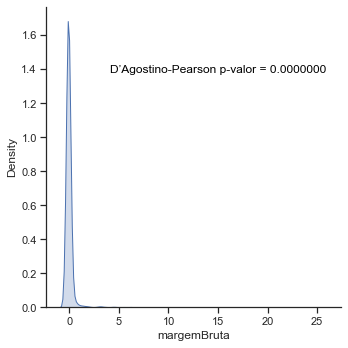

In [277]:
vetor_teste = X['margemBruta'].values
ax1 = sns.displot(X_scale['margemBruta'], kind="kde", fill=True)
axn = ax1.axes.ravel()[0]
axn.annotate(
xy=(15, 1.4), 
ha='center', 
va='center', 
fontsize=12, 
color='black', 
text='D’Agostino-Pearson p-valor = '+'{:,.7f}'.format(stats.normaltest(vetor_teste)[1]),
clip_on=True,                   # <---  important
)
plt.show()

Rejeitando o teste, assume-se que a distribuição não é normal

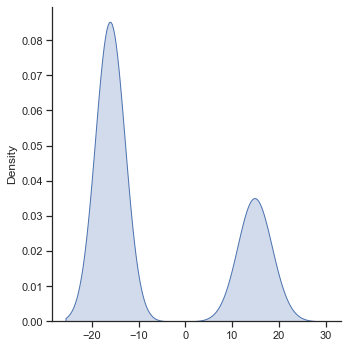

In [287]:
vetor_teste = [math.log(0.0000001) if val<=0 else math.log(val) for val in X['margemBruta'].values]
ax1 = sns.displot(vetor_teste, kind="kde", fill=True)
axn = ax1.axes.ravel()[0]
axn.annotate(
xy=(-1, 0.18), 
ha='center', 
va='center', 
fontsize=12, 
color='black', 
text='D’Agostino-Pearson p-valor = '+'{:,.7f}'.format(stats.normaltest(vetor_teste)[1]),
clip_on=True,                   # <---  important
)
plt.show()

Com a transformação, temos que agora não rejeitamos o teste de normalidade na distribuição da variável.

Assim sendo fazemos a normalização das variáveis:

In [ ]:
colunas_teste = ['margemBrutaAcumulada','percentualProtestos','faturamentoBruto','margemBruta'
                 ,'custos','capitalSocial','restricoes','scorePontualidade']

In [18]:
kmeans = KMeans(4, random_state=0)
labels_KMEANS = kmeans.fit(X_scale).predict(X_scale)

In [19]:
gmm = GaussianMixture(n_components=4).fit(X_scale)
labels_GMM = gmm.predict(X_scale)

Visualizando os casos com componentes principais e validando se as variáveis explicam bem a variabilidade total dos casos.

In [20]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

Verificando o % de explicação por componente principal

In [21]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  

array([ 26.74,  39.25,  50.15,  60.36,  69.99,  78.78,  86.59,  93.86,
        97.15, 100.  ])

In [22]:
df_comp = pd.DataFrame(X_reduced,columns=['PC'+str(num_c) for num_c in range(0,pca.n_components_)])
df_comp['labels_KMEANS']=labels_KMEANS
df_comp['labels_GMM']=labels_GMM
X['labels_KMEANS']=labels_KMEANS
X['labels_GMM']=labels_GMM
df_comp.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,labels_KMEANS,labels_GMM
0,-0.442137,0.729982,-0.636816,-0.199829,0.359702,0.932409,-0.257702,0.801978,-0.027778,-0.022640,3,3
1,-0.509896,-1.017016,-1.055411,-0.173038,0.071001,0.405242,0.588706,-0.708794,0.070962,0.074815,3,3
2,1.016032,-0.557336,0.378276,-0.209635,0.405657,-0.509494,-0.533718,-0.083240,-0.369612,-0.860917,0,2
3,-0.053690,0.036738,0.717991,-0.127360,0.323460,-0.456082,-0.449861,0.508172,-0.018140,-0.142574,0,0
4,-0.223696,0.573461,0.821854,-0.125032,0.372968,-0.384228,-0.636467,0.947186,0.655465,-0.352271,0,2


Verificando as quantidades de individuos por grupo, cruzando cada técnica:

In [23]:
#fazer um grafico para mostrar a distribuição de cada categoria definida pelas colunas:
df_comp.groupby(['labels_KMEANS','labels_GMM'])['PC0'].count()


labels_KMEANS  labels_GMM
0              0             857
               1              48
               2             117
1              1              10
               2             176
2              1               1
               2               8
3              1               6
               2              47
               3             794
Name: PC0, dtype: int64

Visualizando com componentes principais

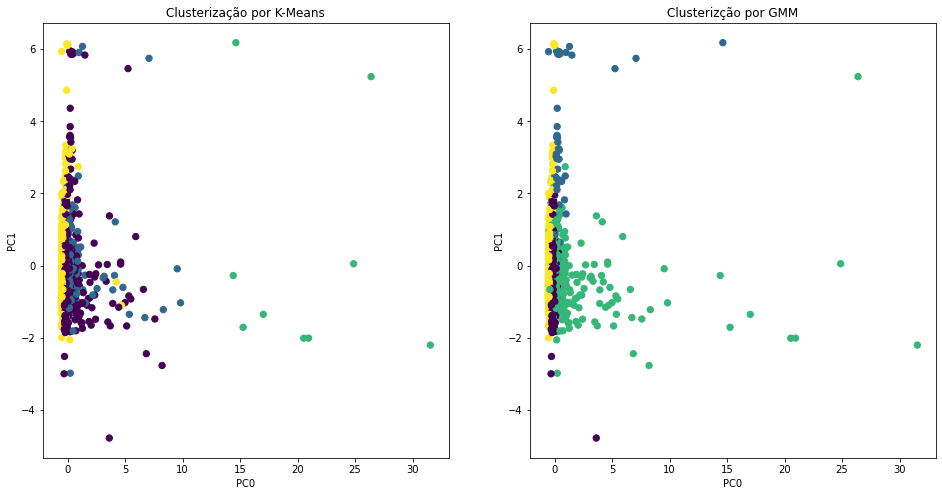

In [24]:
from turtle import title

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.scatter(df_comp['PC0'], df_comp['PC1'], c=df_comp['labels_KMEANS'], s=40, cmap='viridis')
ax1.set_title('Clusterização por K-Means')
ax2.scatter(df_comp['PC0'], df_comp['PC1'], c=df_comp['labels_GMM'], s=40, cmap='viridis')
ax2.set_title('Clusterizção por GMM')

for ax in fig.axes:
    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')

Visualizando por cada variável

Primeiramente por KMEANS

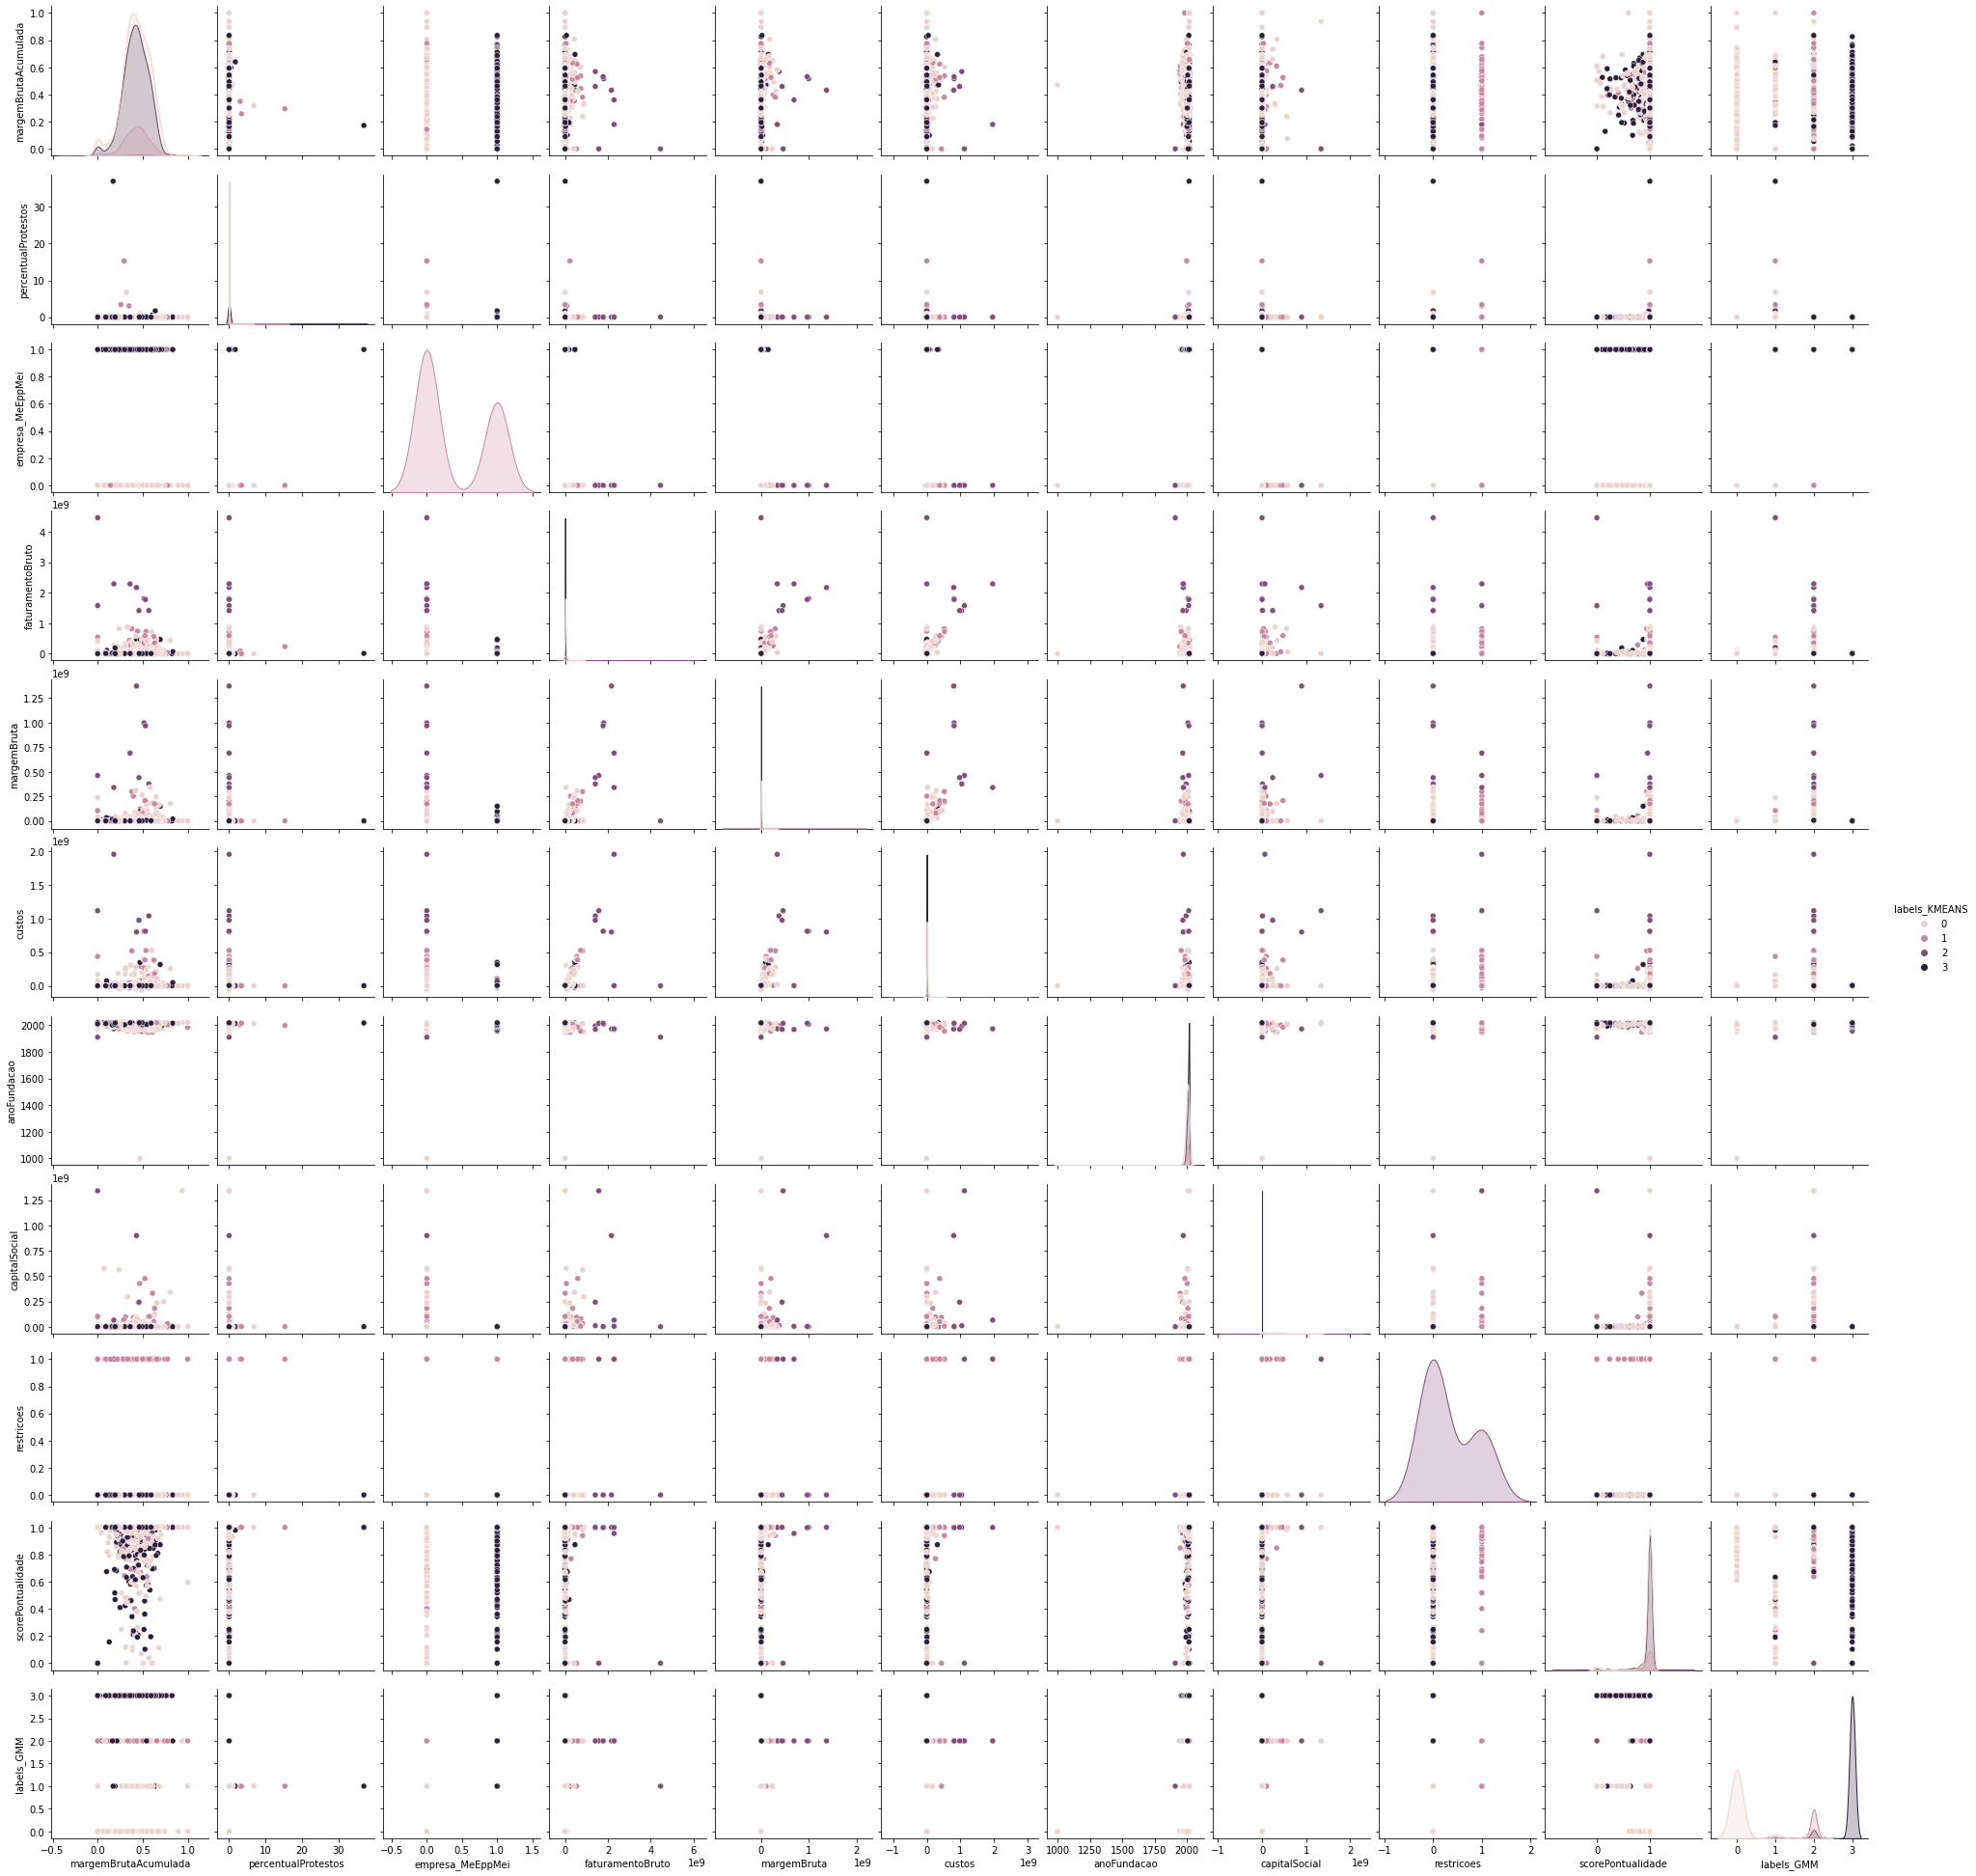

In [25]:
sns.pairplot(X, hue="labels_KMEANS")

Por GMM

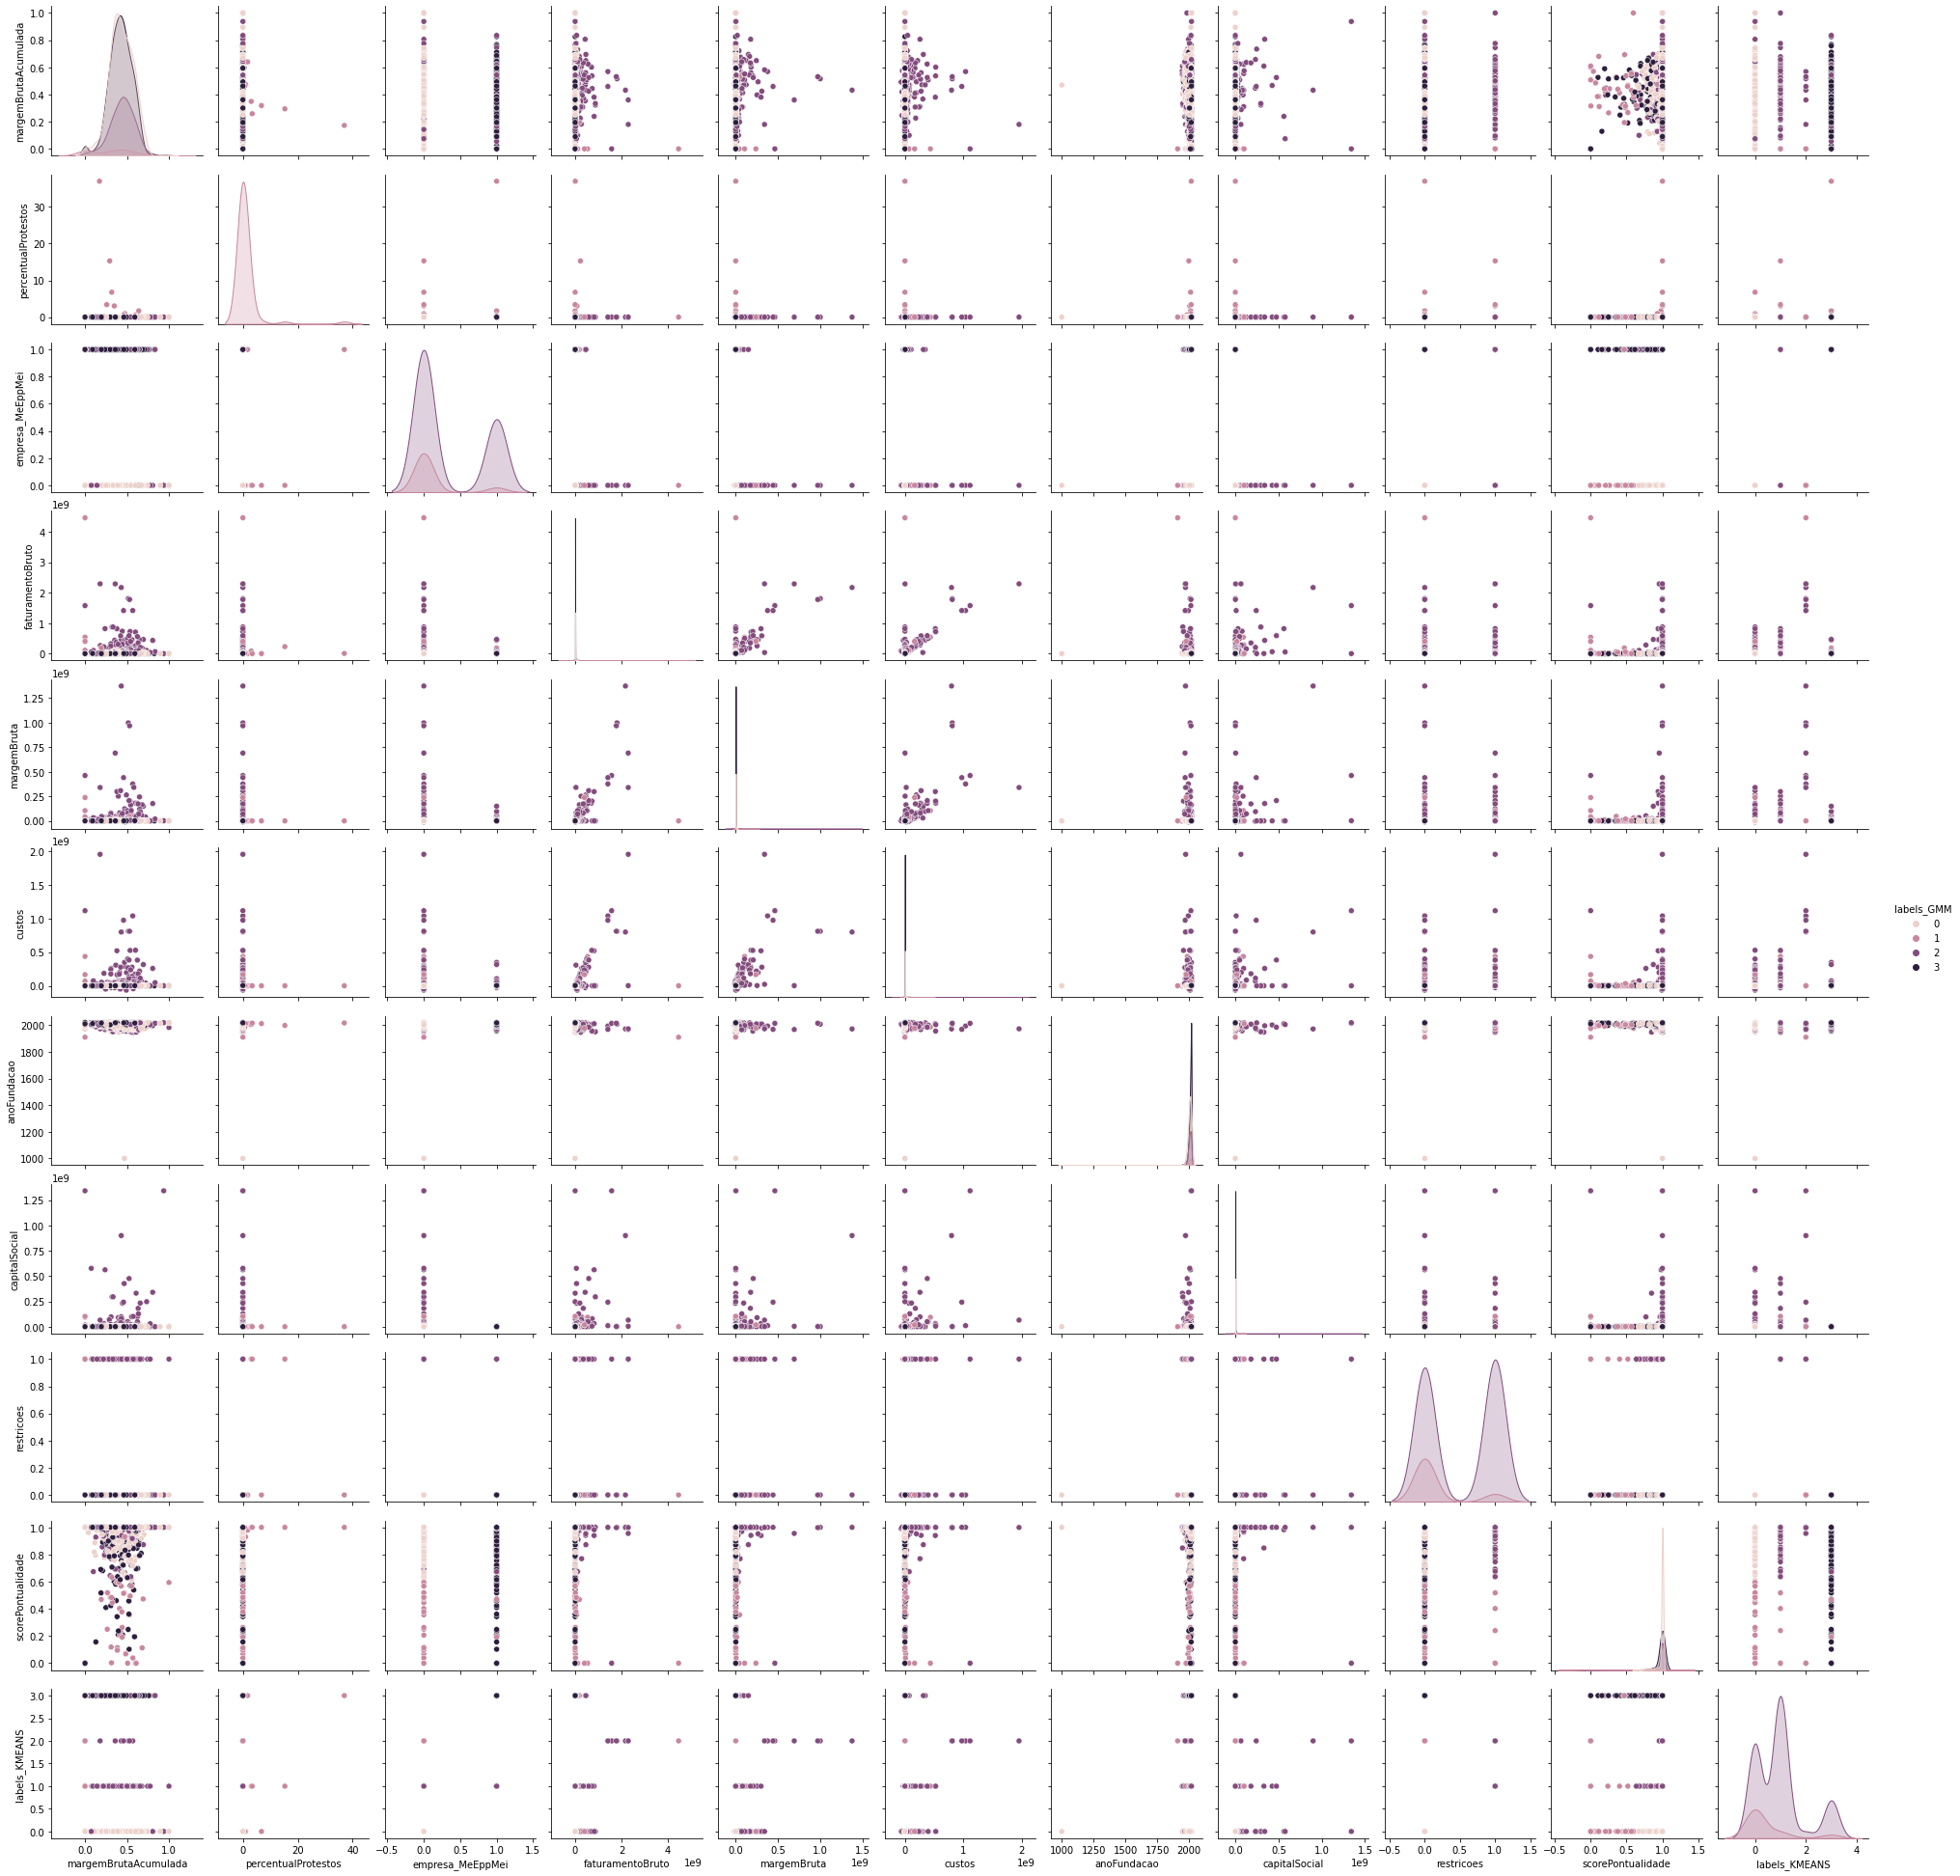

In [26]:
sns.pairplot(X, hue="labels_GMM")

Verificando métricas entre grupos, e também a variancia entre grupos:

In [27]:
from scipy.spatial import distance
matrix_dist = distance.cdist(X, X, 'euclidean')

In [28]:
pd_distancias = pd.DataFrame(matrix_dist,columns=X.index.values)
pd_distancias = pd_distancias.stack()
pd_distancias.name = 'distancia'
pd_distancias = pd_distancias.reset_index()

In [29]:
X_labels = X[['labels_KMEANS','labels_GMM']]
X_labels['index_chave'] = X_labels.index.values
X_labels_1 = X_labels.rename({'labels_KMEANS':'labels_KMEANS_1','labels_GMM':'labels_GMM_1','index_chave':'index_chave'},axis='columns').copy()
X_labels_2 = X_labels.rename({'labels_KMEANS':'labels_KMEANS_2','labels_GMM':'labels_GMM_2','index_chave':'index_chave'},axis='columns').copy()
pd_distancias = pd_distancias.merge(X_labels_1,left_on='level_0',right_on='index_chave',how='inner')
pd_distancias = pd_distancias.merge(X_labels_2,left_on='level_1',right_on='index_chave',how='inner')
dist_entre_GMM = pd_distancias[pd_distancias['labels_KMEANS_2']!=pd_distancias['labels_KMEANS_1']]['distancia'].sum()
dist_entre_KMEANS=pd_distancias[pd_distancias['labels_GMM_2']!=pd_distancias['labels_GMM_1']]['distancia'].sum()

C:\Users\krums\AppData\Local\Temp\ipykernel_7872\2529771682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_labels['index_chave'] = X_labels.index.values


In [30]:
razao_vars = dist_entre_KMEANS/dist_entre_GMM
if razao_vars>1:
    resp = 'maior'
else:
    resp='menor'

In [31]:
print('A distancia entre grupos de KMEANS é {razao_vars}% {resp} do que o agrupamento por GMM'.format(razao_vars=round(abs(1-razao_vars)*100,2), resp=resp))

A distancia entre grupos de KMEANS é 11.35% maior do que o agrupamento por GMM


Sabendo disso, temos que o candidato a ser o melhor agrupamento sendo o KMEANS por discriminar melhor os 2 grupos. De qualquer forma, vamos analisar como esses 4 grupos por tipo se classificam:

Para isso vou separar na descritiva de categóricas e numericas, tendo discretas e continuas:

In [32]:
df_clientes['index'] = df_clientes.index
df_clientes = df_clientes.merge(X_labels,left_on='index',right_on='index_chave',how='inner').copy()
df_clientes.labels_KMEANS = df_clientes.labels_KMEANS.astype("category")
df_clientes.labels_GMM = df_clientes.labels_GMM.astype("category")
df_clientes.drop(['index_chave'],axis=1,inplace=True)

In [33]:

colunas_cont = ['margemBrutaAcumulada','percentualProtestos'
                        ,'faturamentoBruto','margemBruta','custos'
                        ,'anoFundacao','capitalSocial','scorePontualidade']

labels_cols=['labels_GMM','labels_KMEANS','index']

# empilhando as variáveis num formato longo:
# all_columns = df_clientes.columns
df_clientes_emp  = df_clientes.melt(id_vars=labels_cols)
df_clientes_emp_c = df_clientes_emp.loc[[elm in colunas_cont for elm in df_clientes_emp['variable'].values]]
# df_clientes_emp_c['variable'].drop_duplicates()

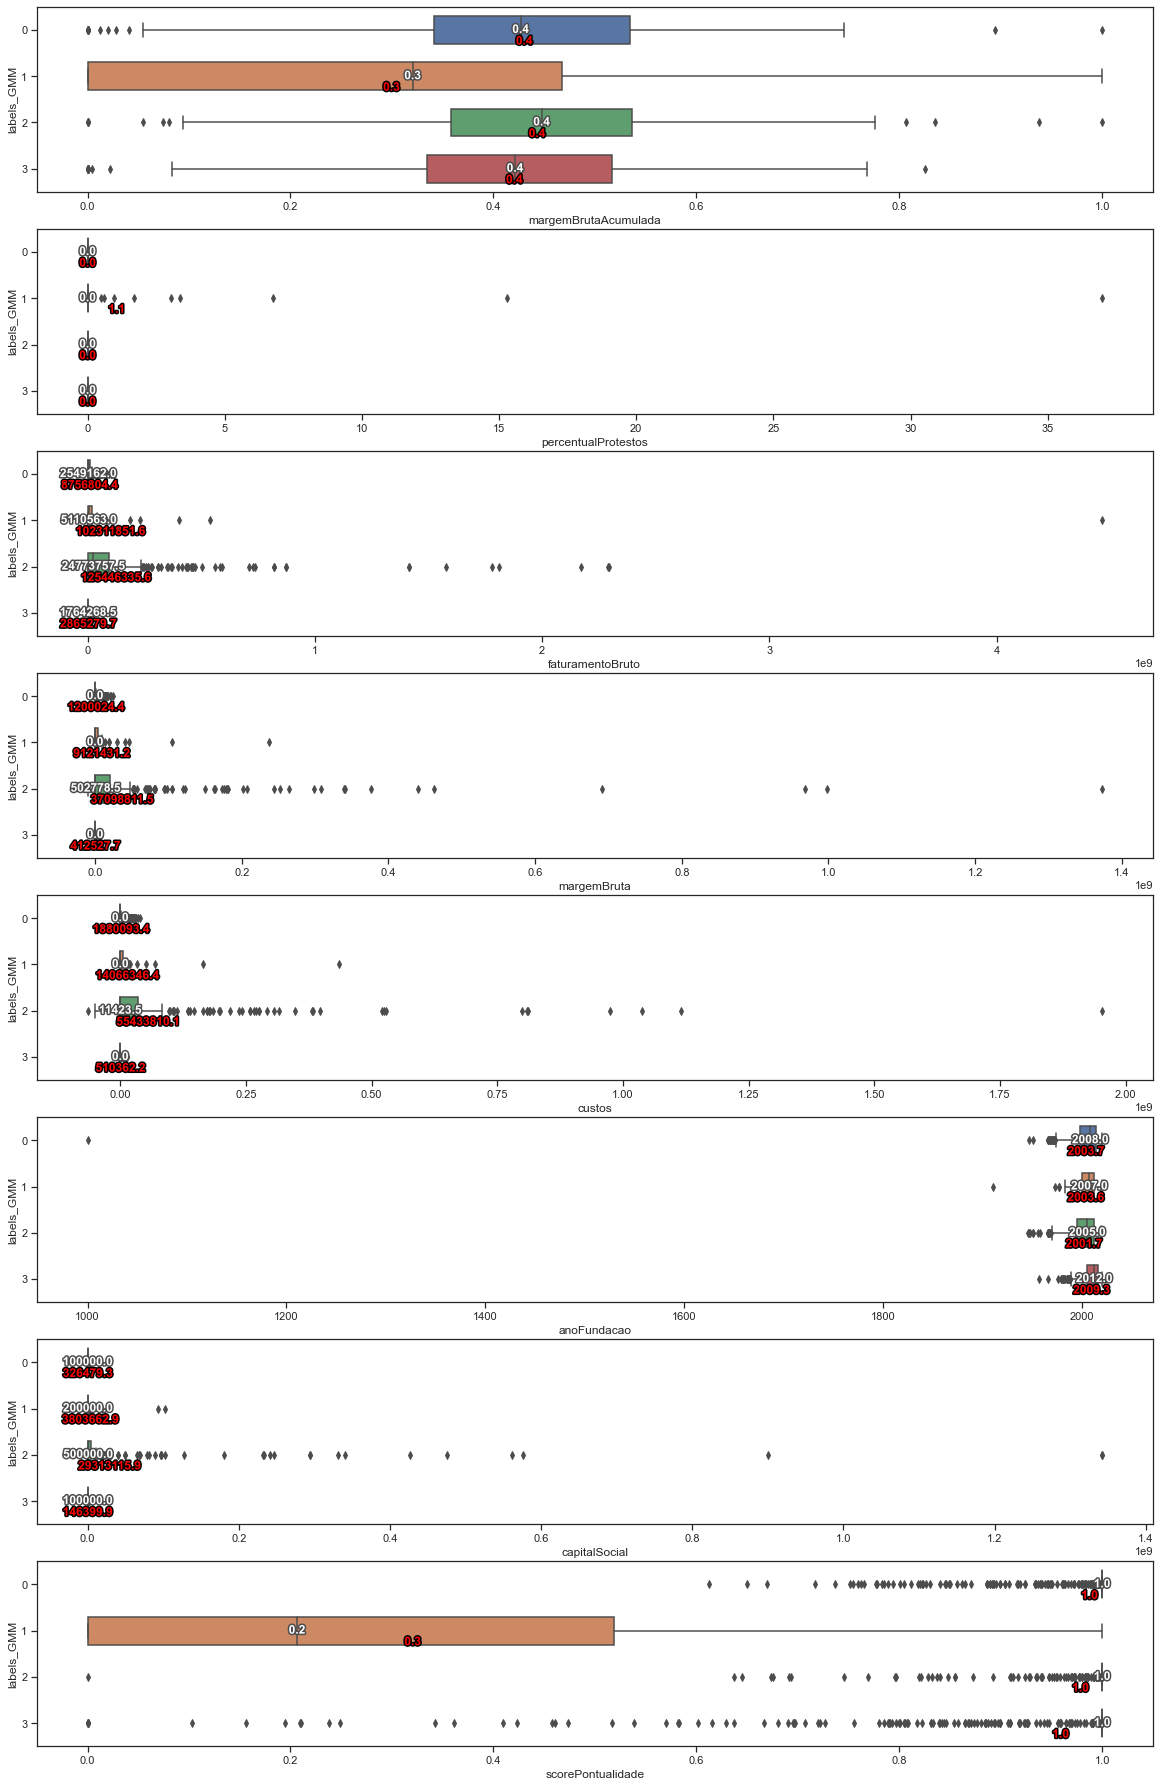

In [123]:
#criar uma imagem para colocar todas os plots do seaborn um embaixo do outro:

sns.set_theme(style="ticks")
fig, (axs) = plt.subplots(colunas_cont.__len__(),1, figsize=(20,colunas_cont.__len__()*4))
axs = axs.flatten()

labels_selec = 'labels_GMM'

for variable in colunas_cont:
    sns.boxplot(data=df_clientes,y=labels_selec, x=variable, width=.6,ax=axs[colunas_cont.index(variable)])
    add_median_labels(axs[colunas_cont.index(variable)])
    
    #trazendo a média:
    categs_labels = df_clientes[labels_selec].drop_duplicates().values
    
    for y in categs_labels:
        x = df_clientes.loc[df_clientes[labels_selec]==y][variable].mean()
        text = axs[colunas_cont.index(variable)].text(x, y+0.25, f'{x:{".1f"}}', ha='center', va='center',fontweight='bold', color='red')
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])

        
# sns.violinplot(y="labels_GMM", x=col_cont, data=df_clientes,inner="points", orient="h")

# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

Trazendo em formato de tabela

In [122]:
#lembrando da distribuição de empresas por cluster:
df_clientes[['labels_GMM','index']].groupby(['labels_GMM']).count()

,index
labels_GMM,
0,857
1,65
2,348
3,794


In [127]:
#colunas para resumo:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:,.2f}'.format)
cols_selec_resumo = [elm for elm in df_clientes.columns if elm not in ['index','cnpjSemTraco','labels_KMEANS','primeiraCompra','periodoDemonstrativoEmMeses']]
describe_clus = df_clientes.filter(cols_selec_resumo,axis=1).groupby(labels_selec).describe(include='all',datetime_is_numeric=True).transpose()
# inferno na terra para selecionar essa porcaria:
#criando o index que possui todas as variáveis que queremos:
lista_indices = list(itertools.product(cols_selec_resumo,['min','25%','50%','75%','max']))
describe_clus.filter(lista_indices,axis=0)
# posso criar graficos de barra para cada valor desse describe por grupo, sendo minimo, media e maximo como barras diferentes lado a lado por grupo, por variável


labels_GMM                            0                1                2             3
maiorAtraso          min           0.00             0.00             0.00          0.00
                     25%           0.00             0.00             1.50          0.00
                     50%           4.00            14.00             5.00          4.00
                     75%          14.00            60.00            22.00         17.00
                     max         977.00           222.00           794.00        779.00
valorSolicitado      min       1,600.00        10,000.00         5,000.00      3,000.00
                     25%      20,000.00        20,000.00        25,000.00     20,000.00
                     50%      30,000.00        50,000.00        50,000.00     30,000.00
                     75%      50,000.00       100,000.00       150,000.00     50,000.00
                     max   5,000,000.00     1,000,000.00     4,900,000.00  1,300,000.00
margemBrutaAcumulada min           0.00             0.00             0.00          0.00
                     25%           0.34             0.00             0.36          0.33
                     50%           0.43             0.32             0.45          0.42
                     75%           0.53             0.47             0.54          0.52
                     max           1.00             1.00             1.00          0.83
percentualProtestos  min           0.00             0.00             0.00          0.00
                     25%           0.00             0.00             0.00          0.00
                     50%           0.00             0.00             0.00          0.00
                     75%           0.00             0.00             0.00          0.00
                     max           0.00            36.98             0.00          0.00
faturamentoBruto     min           0.00             0.00             0.00          0.00
                     25%     810,910.00     1,297,930.00     1,917,683.50    672,257.00
                     50%   2,549,162.00     5,110,563.00    24,773,757.50  1,764,268.50
                     75%   8,701,209.00    18,679,954.00    96,491,924.75  3,604,106.25
                     max 114,682,989.00 4,464,000,000.00 2,293,247,000.00 28,233,980.00
margemBruta          min    -338,047.00             0.00   -10,215,304.00   -197,905.00
                     25%           0.00             0.00             0.00          0.00
                     50%           0.00             0.00       502,778.50          0.00
                     75%     580,525.00     3,676,928.00    20,196,463.25          0.00
                     max  24,576,811.00   237,826,280.00 1,373,143,082.00  8,085,574.00
custos               min  -2,911,344.00             0.00   -65,022,701.00 -1,816,507.00
                     25%           0.00             0.00             0.00          0.00
                     50%           0.00             0.00        11,423.50          0.00
                     75%     382,288.00     5,369,348.00    35,263,821.00          0.00
                     max  38,595,442.00   435,992,000.00 1,953,308,000.00 12,876,345.00
anoFundacao          min       1,000.00         1,910.00         1,946.00      1,957.00
                     25%       1,998.00         2,000.00         1,995.00      2,005.00
                     50%       2,008.00         2,007.00         2,005.00      2,012.00
                     75%       2,014.00         2,012.00         2,012.00      2,016.00
                     max       2,020.00         2,020.00         2,019.00      2,020.00
capitalSocial        min           0.00             0.00             0.00          0.00
                     25%      30,000.00        50,000.00        98,850.00     50,000.00
                     50%     100,000.00       200,000.00       500,000.00    100,000.00
                     75%     260,000.00       600,000.00     4,569,617.50    150,000.00
                     max   5,490,041.00 

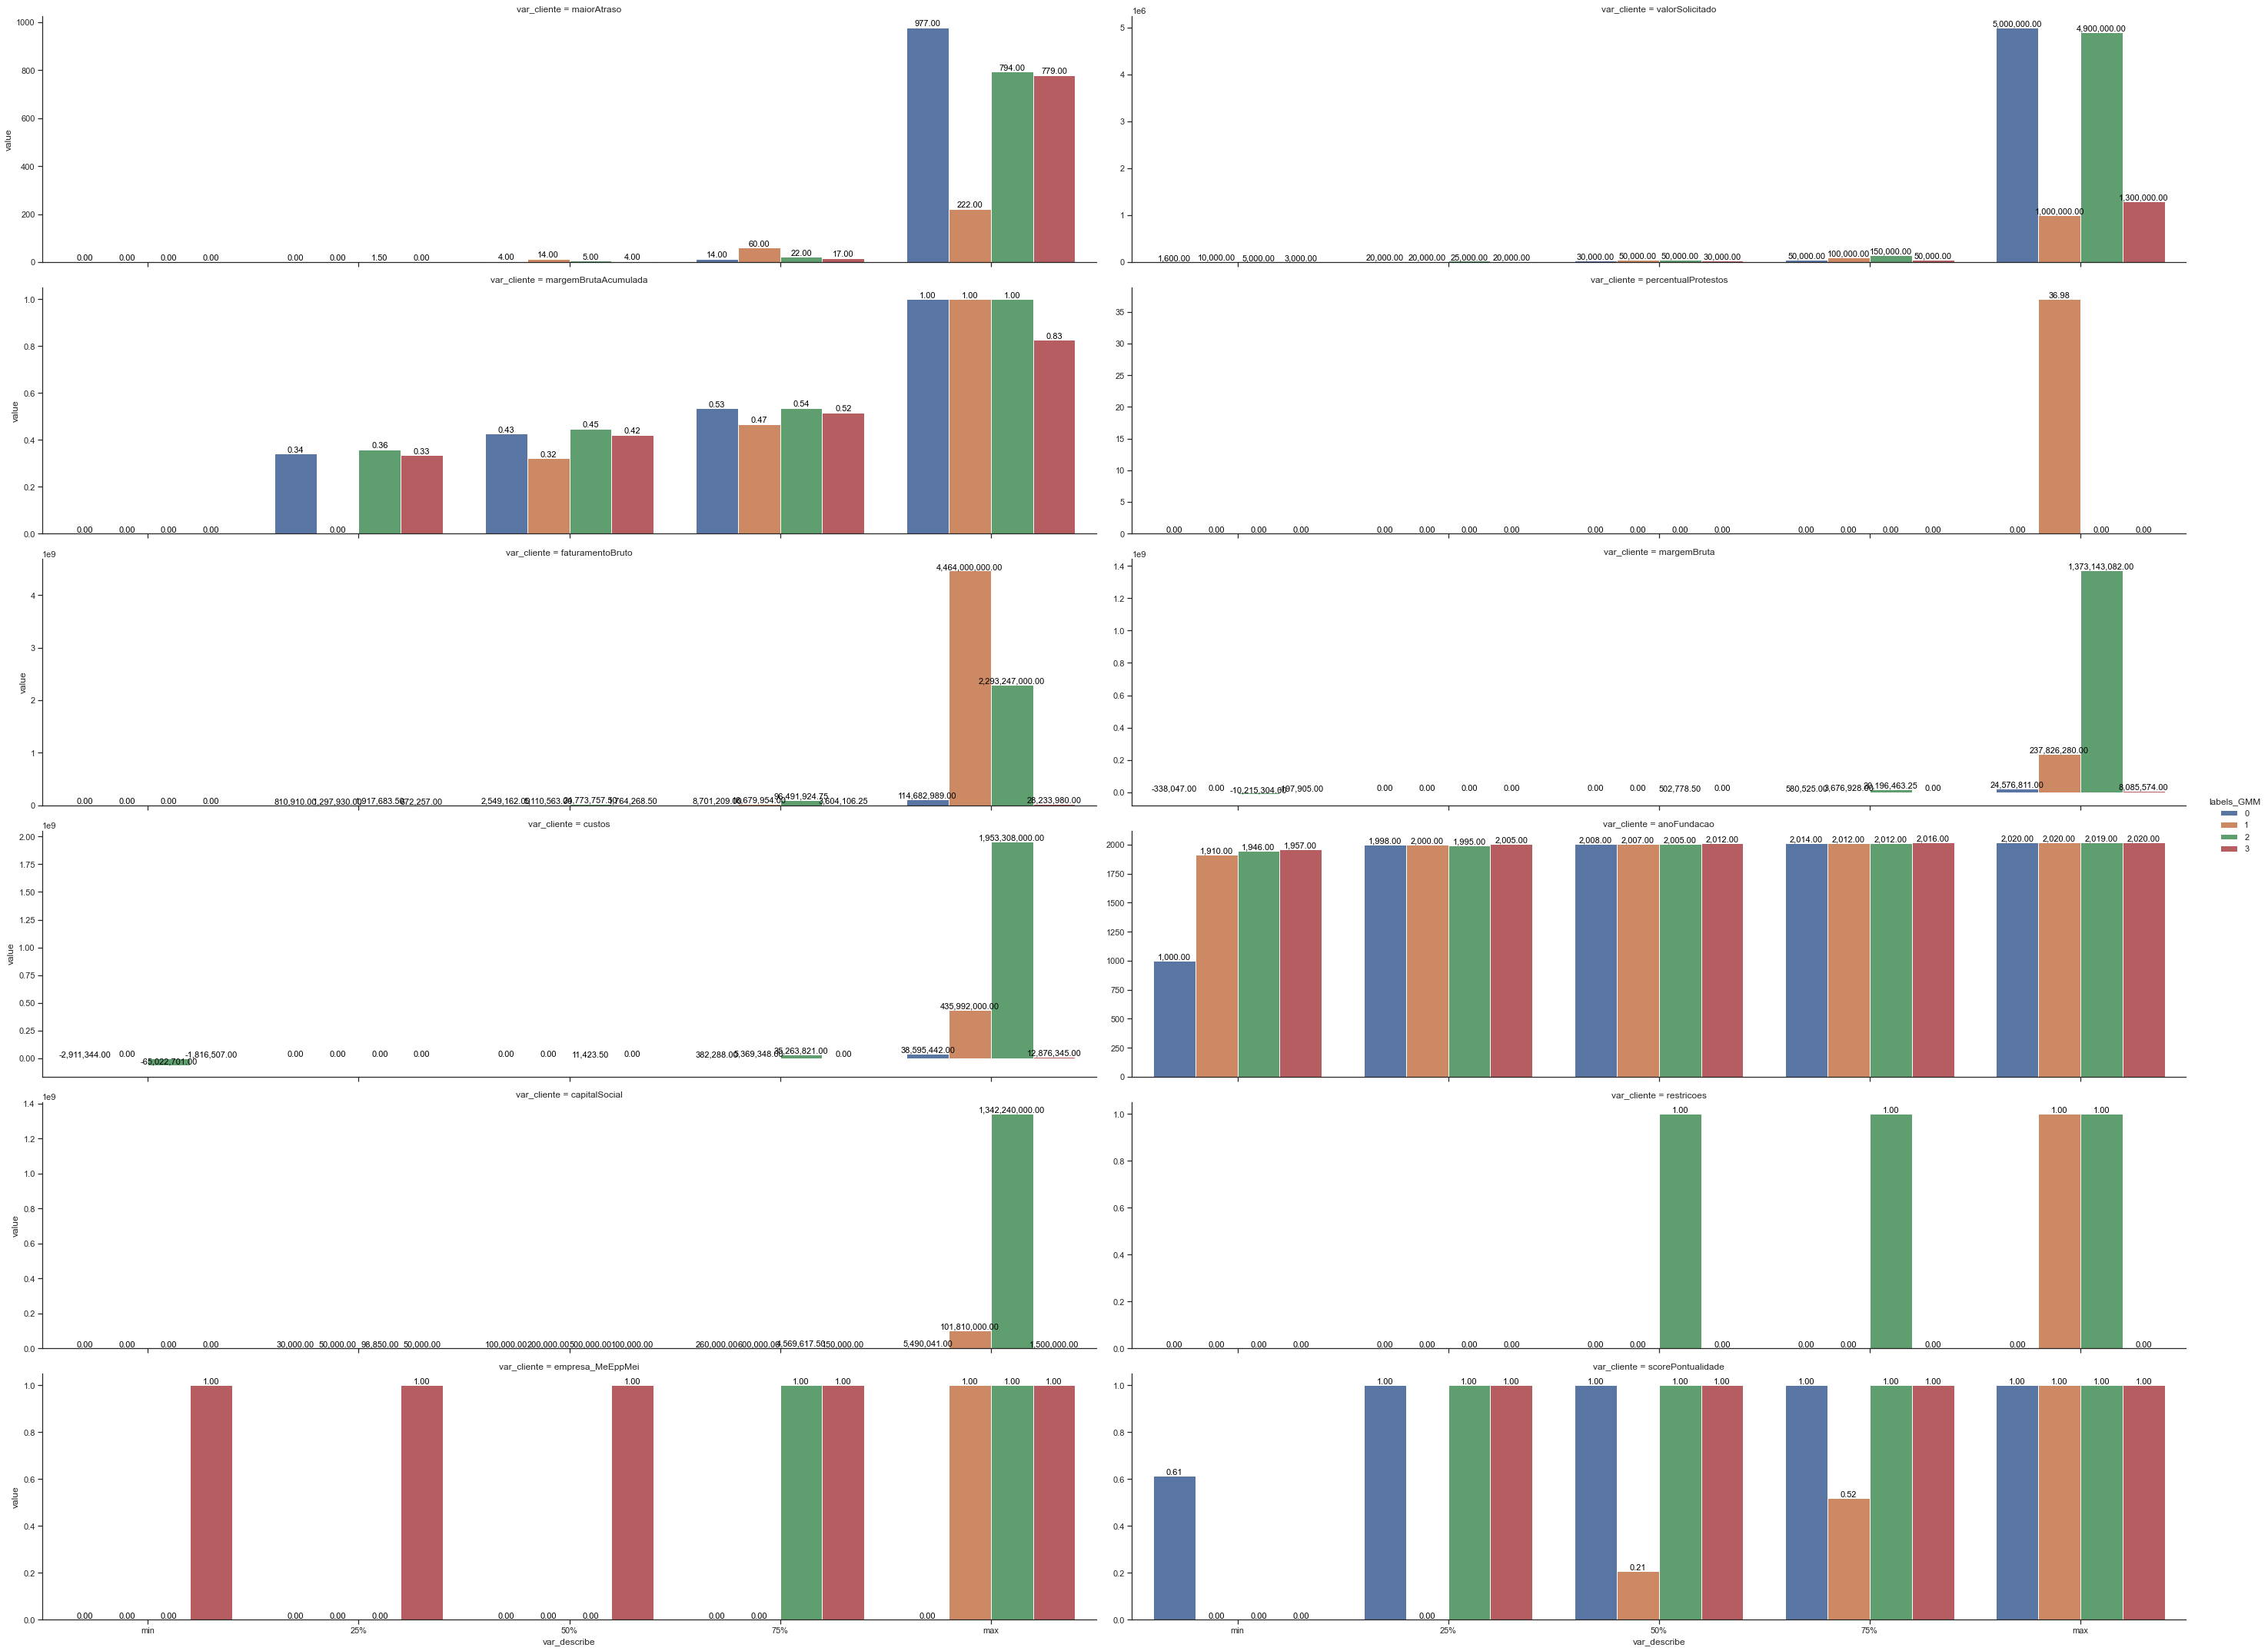

In [128]:
from turtle import width

sns.set_theme(style="ticks") 

# Initialize the figure with a logarithmic x} axis

# df_describe_vars = pd.DataFrame(list(describe_clus.index.values),columns=['var_cliente','var_describe'])
df_describe = describe_clus.filter(lista_indices,axis=0).reset_index()
df_describe.rename({'level_0':'var_cliente','level_1':'var_describe'},axis='columns',inplace=True)
df_describe = df_describe.melt(id_vars=['var_describe','var_cliente'])
# df_describe.drop(['labels_KMEANS'],axis=1)

# sea = sns.FacetGrid(df_describe, row = "var_cliente")
#sea.map(sns.barplot, "var_describe", "pulse",order = ["no fat", "low fat"])


#g = sns.FacetGrid(df_describe, col='var_cliente', hue="labels_KMEANS", col_wrap=2,sharey=False,aspect=3)
#g.map(sns.barplot, 'var_describe', 'value', order=df_describe.var_describe.unique(),dodge=True).add_legend()
g = sns.catplot(data=df_describe, x="var_describe", y="value"
                ,col="var_cliente",hue='labels_GMM'
                ,kind='bar',sharey=False,aspect=4,height=5,col_wrap=2)

for ax in g.axes:
    for p in ax.patches:
             ax.annotate('{:,.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

Com estes graficos de barras resumindo percentis de cada variável quantitativa dos clusters, podemos assumir algumas premissas sobre os grupos. Abaixo enumeramos caracteristicas inerentes a cada um deles para podermos depois determinarmos a segmentação para futuros clientes:

0. Tier  

# 3. Modelagem para análise de crédito
Para o modelo de análise de credito, podemos dividir em:

- Modelos conforme score
- Modelo para primeira compra
- Modelo para clientes recorrentes